# PUBG Game Prediction

<center><img src="https://i.giphy.com/media/v1.Y2lkPTc5MGI3NjExdXZsYmVuY2ZjNGJ2OG1wMmVobWwwOWN3bGdwMXJ1cnY1djFwZGhtNCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/Li0OOdFFgAfECfuE9H/giphy.gif"></center>

# Table Contents

1. [Importing Libraries](#key1)
2. [Reading Data](#key2)
3. [Data Wrangling](#key3)
4. [Feature Engineering](#key4)
5. [ML-CatBoost Model](#key5)

# Importing Libraries<a class = "anchor" id = "key1"></a>

In [5]:
import numpy as np
import pandas as pd

#visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import catboost as cp
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Reading Data<a class = "anchor" id = "key2"></a>

In [49]:
df = pd.read_csv("PUBG_Game_Prediction_data.csv")
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [7]:
df.shape

(4446966, 29)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

# Data Wrangling<a class = "anchor" id = "key3"></a>

In [10]:
df[df["winPlacePerc"].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [50]:
df.drop(2744604, inplace = True)

In [51]:
df["playersJoined"] = df.groupby("matchId")["matchId"].transform("count")

In [13]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,96
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,91
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0000,0,0.00,0,0,161.80,2,0,0.7755,98
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0000,0,0.00,0,0,202.70,3,0,0.1667,91
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0000,0,0.00,0,0,49.75,2,0,0.1875,97


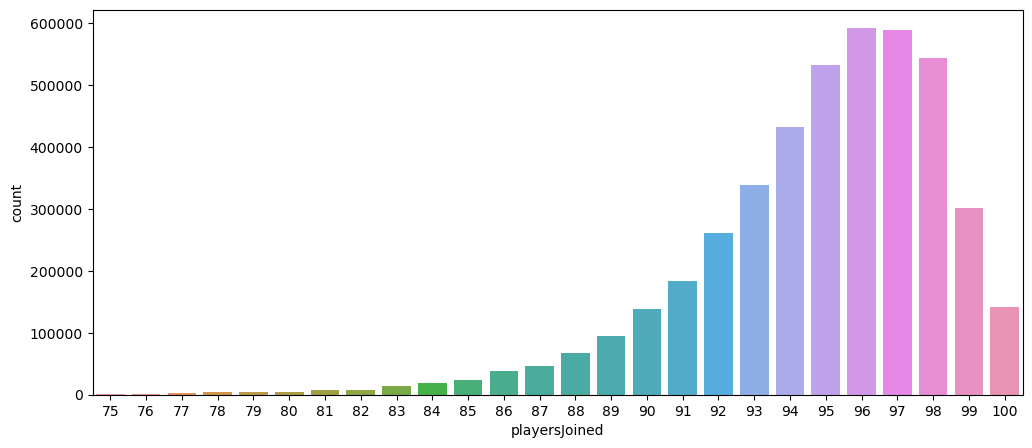

In [34]:
plt.figure(figsize = (12,5))
sns.countplot(x = df[df["playersJoined"]>=75]["playersJoined"],data = df)
plt.show()

### kills without moving


In [52]:
df["totalDistance"] = df["rideDistance"] + df["walkDistance"] + df["swimDistance"]

df["killsWithoutMoving"] = ((df["kills"]>0) & (df["totalDistance"]==0 ))

In [36]:
df["killsWithoutMoving"]

0          False
1          False
2          False
3          False
4          False
           ...  
4446961    False
4446962    False
4446963    False
4446964    False
4446965    False
Name: killsWithoutMoving, Length: 4446965, dtype: bool

In [37]:
df[df["killsWithoutMoving"]==True]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined,totalDistance,killsWithoutMoving
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.000,0,0,3,18,...,0.0,0,0,0.0,8,0,0.8571,58,0.0,True
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.600,0,0,6,33,...,0.0,0,0,0.0,22,0,0.6000,42,0.0,True
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.000,0,4,5,3,...,0.0,0,0,0.0,13,0,0.8947,21,0.0,True
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0,157.800,0,0,0,69,...,0.0,0,0,0.0,7,1500,0.0000,73,0.0,True
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0,100.000,0,1,0,37,...,0.0,0,0,0.0,10,0,0.3000,42,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4440232,1f3a6d69d22c7e,60b2849191c539,ff9cd80c0d8fb7,0,0,4.316,0,0,0,61,...,0.0,0,0,0.0,7,1500,0.8889,75,0.0,True
4440898,a089cb33a75968,eda174acfb503b,4c6b1a0e4cb346,0,0,90.830,0,0,4,42,...,0.0,0,0,0.0,8,0,0.0000,49,0.0,True
4440927,0634c650048997,5ccccee03a7f17,fc0bbecba8db99,2,2,909.100,7,2,16,26,...,0.0,0,0,0.0,7,1500,0.6000,47,0.0,True
4441511,f5d385cadfab7e,a068f79011113c,fc0bbecba8db99,6,2,696.400,9,2,0,18,...,0.0,1,0,0.0,16,1500,0.9000,47,0.0,True


In [53]:
df.drop(df[df["killsWithoutMoving"]==True].index,inplace = True)

## ExtraOrdinary Road Kills


In [39]:
df[df["roadKills"]>5]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined,totalDistance,killsWithoutMoving
39338,0097d2ae7a8576,b61edfa0c228d4,a786011fe206e9,1,2,495.7,4,0,0,2,...,0.000,0,0,72.80,1,0,0.9362,92,5202.8000,False
90312,0e6ea81fd1b9b3,1e96ac916d6fbb,3f150f3834422c,2,6,190.0,0,0,5,2,...,0.000,0,1,976.80,4,0,0.9556,89,4257.8000,False
197752,6cf1efa197bcc1,28df010b29a9e2,2e40495266529f,0,2,800.0,5,0,4,1,...,0.000,0,0,1516.00,3,0,0.6538,89,10085.0000,False
209676,5df28fce2b8128,32a01a5517635a,ee9fb50eb0fe00,0,3,360.0,2,0,4,1,...,0.000,0,0,36.96,0,0,1.0000,59,6142.9600,False
213544,612ee3024560a3,ab0162b0300c59,7c5535bfd43592,1,2,426.3,3,0,0,1,...,0.000,0,0,128.30,3,0,0.9167,96,3607.3000,False
217319,9ef0f556066da8,278849cc7a65de,348ff3a27810b7,0,0,700.0,0,0,0,2,...,7.440,0,0,1959.00,2,1512,0.3896,78,5444.4400,False
274649,5136fee873f4b1,63e7c4ac9dbdda,d7c0d6eb7ac88a,0,0,499.6,3,0,1,2,...,0.000,0,0,68.91,0,0,0.8333,93,4706.9100,False
348353,0f4f8a48c82788,08dd4375a984b4,893aa741790f12,0,0,366.7,1,0,0,1,...,0.000,0,0,492.80,2,0,0.9388,93,5764.8000,False
384553,aa419c2e3baada,7f4a9befdfa2a4,74d78cb420efdd,0,0,800.0,0,0,0,1,...,14.310,0,0,425.20,2,1594,0.3704,91,1189.4100,False
409898,67c84aae0c3d2c,de65dd2ff095c6,686416703ed45b,0,3,650.9,4,0,1,1,...,0.000,0,1,172.00,1,0,1.0000,95,4983.0000,False


In [54]:
df.drop(df[df["roadKills"]>5].index,inplace = True)

## So many kills - why?

In [41]:
df[df["kills"]>20]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined,totalDistance,killsWithoutMoving
2569,7711e1d39407da,a9fbc63469296f,45fc89f9b11eaf,1,4,2325.0,13,8,2,1,...,0.0,0,0,2697.0,5,1505,1.0000,97,4709.0,False
19531,ef706f0f248dbf,f27e63bfc6746c,7d2fd7f5d4f8b2,9,0,2856.0,32,3,0,1,...,0.0,0,0,1136.0,20,0,0.8000,40,1136.0,False
37505,44513e16340a63,c1e3f56e09b9a4,cf5dd782577ea9,1,2,2767.0,24,17,1,1,...,0.0,0,0,3290.0,7,1509,0.9615,97,5879.0,False
40047,8d8d78ba4e9b55,6634da8e3940de,8a728def0644be,3,0,1988.0,22,6,5,5,...,0.0,0,0,1864.0,33,1500,1.0000,54,3532.0,False
53442,f7a740ffbc2c43,418f6120b2e193,f2614050e9046a,2,0,1906.0,0,4,19,2,...,0.0,0,0,116.7,16,0,1.0000,11,116.7,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4390901,310cdfbe701f03,02b0ccfda16b93,f755207f23cf88,2,4,2645.0,16,8,0,1,...,0.0,0,0,3180.0,7,0,1.0000,91,3180.0,False
4399662,8800992f7dd530,87e52e1a6b0a73,1e573980b3ee3c,1,0,1999.0,0,1,8,5,...,0.0,0,0,111.8,59,1500,0.3333,32,111.8,False
4402706,f69c34cce4d46a,ea800ea1aa6efa,ed092b499ac27d,3,0,2817.0,0,6,2,3,...,0.0,0,0,1147.0,31,1500,0.4000,30,1147.0,False
4420563,0a2721fcf1cdd9,1708576031cf96,fcd20a43cb81ea,6,0,3297.0,0,5,4,1,...,0.0,0,0,253.0,32,0,1.0000,24,253.0,False


Text(0.5, 1.0, 'Distribution of kills by a player')

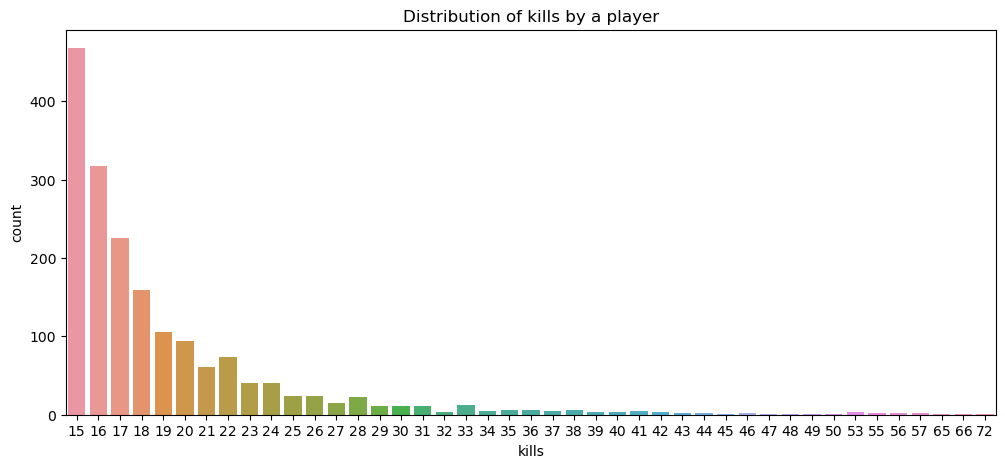

In [55]:
plt.figure(figsize = (12,5))
sns.countplot(data = df, x= df[df["kills"]>=15]["kills"]).set_title("Distribution of kills by a player")

In [56]:
df.drop(df[df["kills"]>20].index,inplace = True)

In [57]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined,totalDistance,killsWithoutMoving
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.00,0,0,244.80,1,1466,0.4444,96,244.8000,False
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,11.04,0,0,1434.00,5,0,0.6400,91,1445.0445,False
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.00,0,0,161.80,2,0,0.7755,98,161.8000,False
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.00,0,0,202.70,3,0,0.1667,91,202.7000,False
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.00,0,0,49.75,2,0,0.1875,97,49.7500,False


## headshot

In [69]:
df["headshotRate"] = df["headshotKills"]/df["kills"]
df["headshotRate"] = df["headshotRate"].fillna(0)

C:\Users\lakshay\AppData\Local\Temp\ipykernel_23252\2495988031.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["headshotRate"], bins = 10)
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='headshotRate', ylabel='Density'>

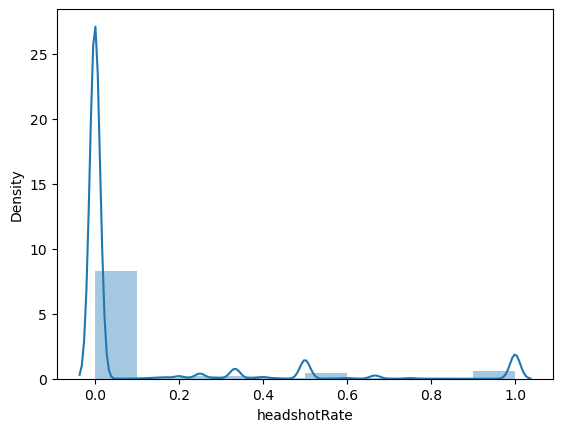

In [70]:
sns.distplot(df["headshotRate"], bins = 10)

In [72]:
df[(df["headshotRate"]==1) & (df["kills"]>5)].shape

(187, 33)

In [73]:
df.drop(df[(df["headshotRate"]==1) & (df["kills"]>5)].index, inplace = True)

## longest shot

C:\Users\lakshay\AppData\Local\Temp\ipykernel_23252\3082091208.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["longestKill"], bins = 30)
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='longestKill', ylabel='Density'>

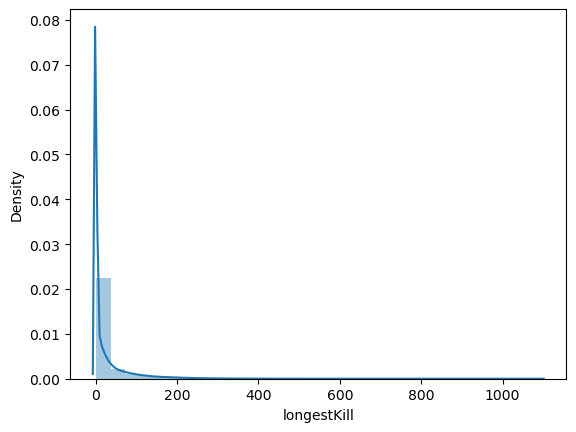

In [74]:
sns.distplot(df["longestKill"], bins = 30)

In [75]:
df[df["longestKill"]>500].shape

(1736, 33)

In [76]:
df.drop(df[df["longestKill"]>500].index,inplace = True)

## Weapon change

C:\Users\lakshay\AppData\Local\Temp\ipykernel_23252\3978076860.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["weaponsAcquired"],bins = 100)
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='weaponsAcquired', ylabel='Density'>

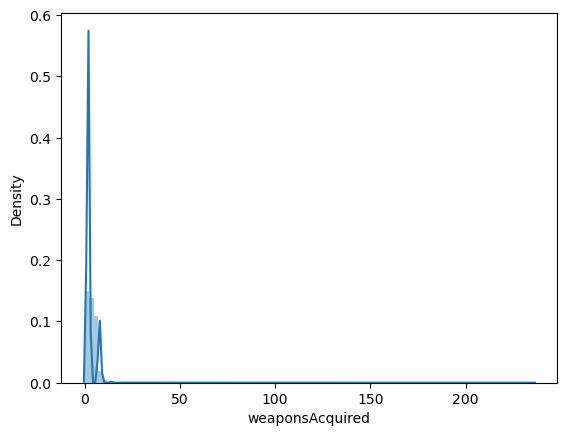

In [77]:
sns.distplot(df["weaponsAcquired"],bins = 100)

In [79]:
df[df["weaponsAcquired"]>=15].shape

(6809, 33)

In [80]:
df.drop(df[df["weaponsAcquired"]>=15].index,inplace = True)

## EDA

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4436235 entries, 0 to 4446965
Data columns (total 33 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   groupId             object 
 2   matchId             object 
 3   assists             int64  
 4   boosts              int64  
 5   damageDealt         float64
 6   DBNOs               int64  
 7   headshotKills       int64  
 8   heals               int64  
 9   killPlace           int64  
 10  killPoints          int64  
 11  kills               int64  
 12  killStreaks         int64  
 13  longestKill         float64
 14  matchDuration       int64  
 15  matchType           object 
 16  maxPlace            int64  
 17  numGroups           int64  
 18  rankPoints          int64  
 19  revives             int64  
 20  rideDistance        float64
 21  roadKills           int64  
 22  swimDistance        float64
 23  teamKills           int64  
 24  vehicleDestroys     int64  
 

In [82]:
df.isnull().sum()

Id                    0
groupId               0
matchId               0
assists               0
boosts                0
damageDealt           0
DBNOs                 0
headshotKills         0
heals                 0
killPlace             0
killPoints            0
kills                 0
killStreaks           0
longestKill           0
matchDuration         0
matchType             0
maxPlace              0
numGroups             0
rankPoints            0
revives               0
rideDistance          0
roadKills             0
swimDistance          0
teamKills             0
vehicleDestroys       0
walkDistance          0
weaponsAcquired       0
winPoints             0
winPlacePerc          0
playersJoined         0
totalDistance         0
killsWithoutMoving    0
headshotRate          0
dtype: int64

D:\Anaconda\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

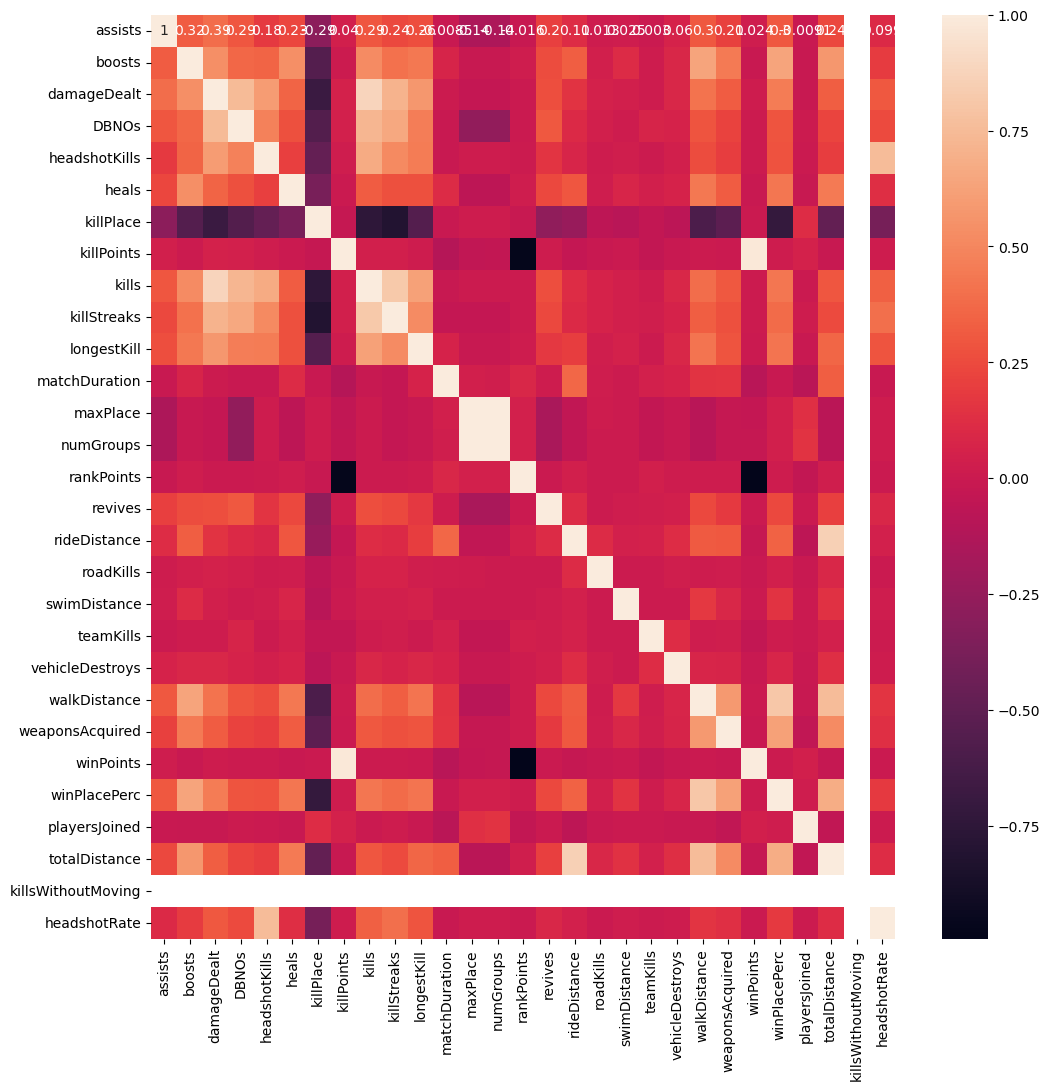

In [84]:
plt.figure(figsize = (12,12))
sns.heatmap(df.corr(numeric_only=True),annot=True)

# Feature Engineering<a class = "anchor" id = "key4"></a>

In [86]:
normalising_factor = ((100 - df["playersJoined"])/100)+1
df["killsNorm"] = df["kills"] * normalising_factor
df["damageDealtNorm"] = df["damageDealt"] * normalising_factor
df["maxPlaceNorm"] = df["maxPlace"] * normalising_factor
df["matchDurationNorm"] = df["matchDuration"] * normalising_factor

df["travelDistance"] = df["walkDistance"] + df["swimDistance"] + df["rideDistance"]
df["heelsnboost"] = df["heals"] = df["boosts"]
df["assist"] = df["assists"] = df["revives"]


In [87]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'playersJoined',
       'totalDistance', 'killsWithoutMoving', 'headshotRate', 'killsNorm',
       'damageDealtNorm', 'maxPlaceNorm', 'matchDurationNorm',
       'travelDistance', 'heelsnboost', 'assist'],
      dtype='object')

In [90]:
data = df.drop(columns=["Id","groupId","matchId","assists",'boosts',"walkDistance","swimDistance","rideDistance","heals","boosts","kills","damageDealt","maxPlace","matchDuration","totalDistance"])

In [91]:
data.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,revives,...,playersJoined,killsWithoutMoving,headshotRate,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,travelDistance,heelsnboost,assist
0,0,0,60,1241,0,0.00,squad-fpp,26,-1,0,...,96,False,0.0,0.00,0.0000,29.12,1358.24,244.8000,0,0
1,0,0,57,0,0,0.00,squad-fpp,25,1484,0,...,91,False,0.0,0.00,99.7023,28.34,1936.93,1445.0445,0,0
2,0,0,47,0,0,0.00,duo,47,1491,0,...,98,False,0.0,0.00,69.3600,51.00,1344.36,161.8000,0,0
3,0,0,75,0,0,0.00,squad-fpp,30,1408,0,...,91,False,0.0,0.00,35.8610,33.79,1565.24,202.7000,0,0
4,0,0,45,0,1,58.53,solo-fpp,95,1560,0,...,97,False,0.0,1.03,103.0000,99.91,1466.72,49.7500,0,0


# ML Catboost Model<a class = "anchor" id = "key5"></a>

## handling categorical data

In [111]:
x = data.drop(["winPlacePerc"], axis = 1)
y = data["winPlacePerc"]

In [112]:
x = pd.get_dummies(x, columns=["matchType", "killsWithoutMoving"],dtype="int")

In [113]:
features = x.columns

In [101]:
x.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,numGroups,rankPoints,revives,roadKills,...,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,killsWithoutMoving_False
0,0,0,60,1241,0,0.00,26,-1,0,0,...,0,0,0,0,0,0,0,0,1,1
1,0,0,57,0,0,0.00,25,1484,0,0,...,0,0,0,0,0,0,0,0,1,1
2,0,0,47,0,0,0.00,47,1491,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,75,0,0,0.00,30,1408,0,0,...,0,0,0,0,0,0,0,0,1,1
4,0,0,45,0,1,58.53,95,1560,0,0,...,0,0,0,0,0,0,1,0,0,1


In [102]:
x.shape

(4436235, 40)

In [104]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x))

In [105]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.582948,-0.384165,0.449325,1.172490,-0.765121,-0.459618,-0.732885,-1.212390,-0.348862,-0.049567,...,-0.033601,-0.005244,-0.013803,-0.008292,-0.054365,-0.206513,-0.370796,-0.405065,1.236180,0.0
1,-0.582948,-0.384165,0.340033,-0.804728,-0.765121,-0.459618,-0.775859,0.803565,-0.348862,-0.049567,...,-0.033601,-0.005244,-0.013803,-0.008292,-0.054365,-0.206513,-0.370796,-0.405065,1.236180,0.0
2,-0.582948,-0.384165,-0.024271,-0.804728,-0.765121,-0.459618,0.169559,0.813067,-0.348862,-0.049567,...,-0.033601,-0.005244,-0.013803,-0.008292,-0.054365,-0.206513,-0.370796,-0.405065,-0.808944,0.0
3,-0.582948,-0.384165,0.995782,-0.804728,-0.765121,-0.459618,-0.560991,0.700391,-0.348862,-0.049567,...,-0.033601,-0.005244,-0.013803,-0.008292,-0.054365,-0.206513,-0.370796,-0.405065,1.236180,0.0
4,-0.582948,-0.384165,-0.097132,-0.804728,0.647736,0.727483,2.232288,0.906738,-0.348862,-0.049567,...,-0.033601,-0.005244,-0.013803,-0.008292,-0.054365,-0.206513,2.696903,-0.405065,-0.808944,0.0


## splitting data

In [106]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=0)
print(xtrain.shape,xtest.shape)
print(ytrain.shape,ytest.shape)

(3105364, 40) (1330871, 40)
(3105364,) (1330871,)


## CatBoost Model

In [107]:
train_dataset = cp.Pool(xtrain,ytrain)
test_dataset = cp.Pool(xtest,ytest)

In [108]:
model = cp.CatBoostRegressor(loss_function="RMSE")

## GRID search

In [110]:
grid = {"iterations":[100,150],
       "learning_rate":[0.03,0.1],
       "depth":[2,4,6,8]}
model.grid_search(grid,train_dataset)

0:	learn: 0.5481979	test: 0.5482408	best: 0.5482408 (0)	total: 246ms	remaining: 24.4s
1:	learn: 0.5333688	test: 0.5334130	best: 0.5334130 (1)	total: 329ms	remaining: 16.1s
2:	learn: 0.5189748	test: 0.5190220	best: 0.5190220 (2)	total: 405ms	remaining: 13.1s
3:	learn: 0.5050662	test: 0.5051193	best: 0.5051193 (3)	total: 484ms	remaining: 11.6s
4:	learn: 0.4915940	test: 0.4916477	best: 0.4916477 (4)	total: 565ms	remaining: 10.7s
5:	learn: 0.4785643	test: 0.4786162	best: 0.4786162 (5)	total: 642ms	remaining: 10.1s
6:	learn: 0.4659790	test: 0.4660347	best: 0.4660347 (6)	total: 724ms	remaining: 9.62s
7:	learn: 0.4538042	test: 0.4538633	best: 0.4538633 (7)	total: 809ms	remaining: 9.31s
8:	learn: 0.4420170	test: 0.4420791	best: 0.4420791 (8)	total: 892ms	remaining: 9.02s
9:	learn: 0.4306359	test: 0.4306996	best: 0.4306996 (9)	total: 977ms	remaining: 8.79s
10:	learn: 0.4196229	test: 0.4196885	best: 0.4196885 (10)	total: 1.06s	remaining: 8.57s
11:	learn: 0.4089227	test: 0.4089883	best: 0.4089883

{'params': {'depth': 8, 'learning_rate': 0.1, 'iterations': 150},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
    

In [114]:
features

Index(['DBNOs', 'headshotKills', 'killPlace', 'killPoints', 'killStreaks',
       'longestKill', 'numGroups', 'rankPoints', 'revives', 'roadKills',
       'teamKills', 'vehicleDestroys', 'weaponsAcquired', 'winPoints',
       'playersJoined', 'headshotRate', 'killsNorm', 'damageDealtNorm',
       'maxPlaceNorm', 'matchDurationNorm', 'travelDistance', 'heelsnboost',
       'assist', 'matchType_crashfpp', 'matchType_crashtpp', 'matchType_duo',
       'matchType_duo-fpp', 'matchType_flarefpp', 'matchType_flaretpp',
       'matchType_normal-duo', 'matchType_normal-duo-fpp',
       'matchType_normal-solo', 'matchType_normal-solo-fpp',
       'matchType_normal-squad', 'matchType_normal-squad-fpp',
       'matchType_solo', 'matchType_solo-fpp', 'matchType_squad',
       'matchType_squad-fpp', 'killsWithoutMoving_False'],
      dtype='object')

In [117]:
feature_importance_df = pd.DataFrame()
feature_importance_df["features"] = features
feature_importance_df["importance"] = model.feature_importances_

feature_importance_df = feature_importance_df.sort_values(by = ["importance"], ascending=False)

In [118]:
feature_importance_df

,features,importance
2,killPlace,39.194154
20,travelDistance,25.739179
16,killsNorm,10.930055
4,killStreaks,5.159607
19,matchDurationNorm,5.055245
14,playersJoined,4.215364
21,heelsnboost,3.293227
6,numGroups,2.504661
5,longestKill,1.087916
0,DBNOs,0.940547


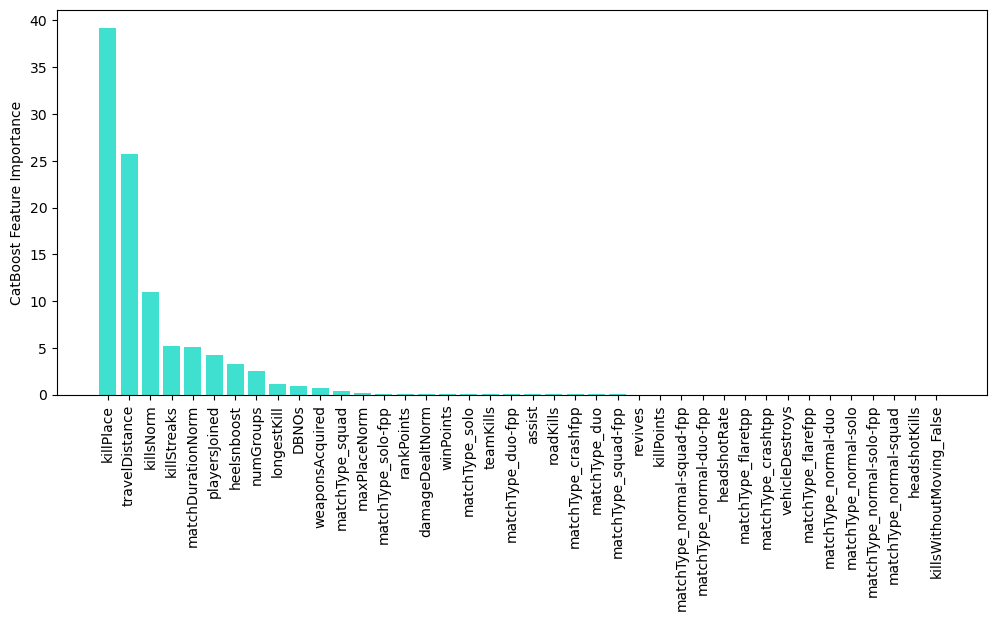

In [122]:
plt.figure(figsize=(12,5))
plt.bar(feature_importance_df.features, feature_importance_df.importance, color='turquoise')
plt.ylabel("CatBoost Feature Importance")
plt.xticks(rotation = 90)
plt.show()

In [123]:
pred = model.predict(xtest)

In [124]:
ytest[:10]

3289841    0.1786
1537261    0.9231
3529603    0.8723
3414934    0.5870
4135036    0.5926
626987     1.0000
2201649    0.4583
3478343    0.7500
3712192    0.3776
1850190    0.7200
Name: winPlacePerc, dtype: float64

In [125]:
pred[:10]

array([0.21848191, 0.89576524, 0.83015238, 0.52718332, 0.57670799,
       0.95956621, 0.41543576, 0.75456204, 0.32285663, 0.83613535])

In [126]:
rmse = np.sqrt(mean_squared_error(ytest,pred))
r2 = r2_score(ytest,pred)
print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))

RMSE: 0.08
R2: 0.93
